In [39]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
sns.set(style='whitegrid')

In [40]:
# load the datset
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising (1).csv


In [41]:
# read the uploaded cvs
df = pd.read_csv('Advertising.csv',index_col=0)


In [42]:
# data overview
print("First 5 rows pf dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

First 5 rows pf dataset:
      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None

Summary statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.9000

In [43]:
# rename columns remove spaces
df.columns = df.columns.str.replace(' ', '_')
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


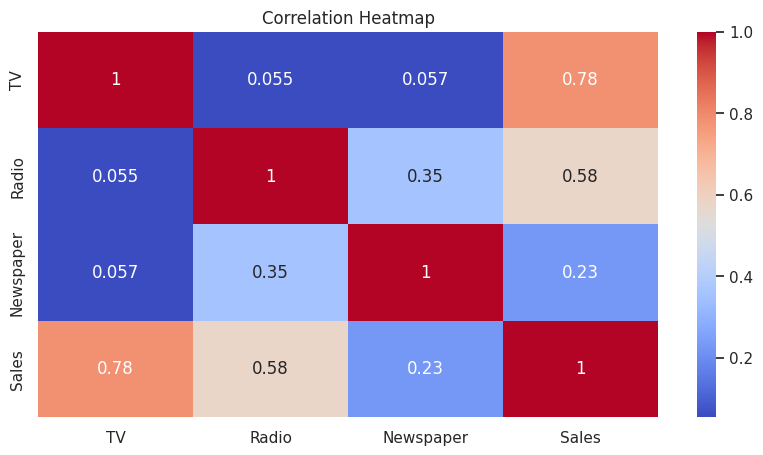

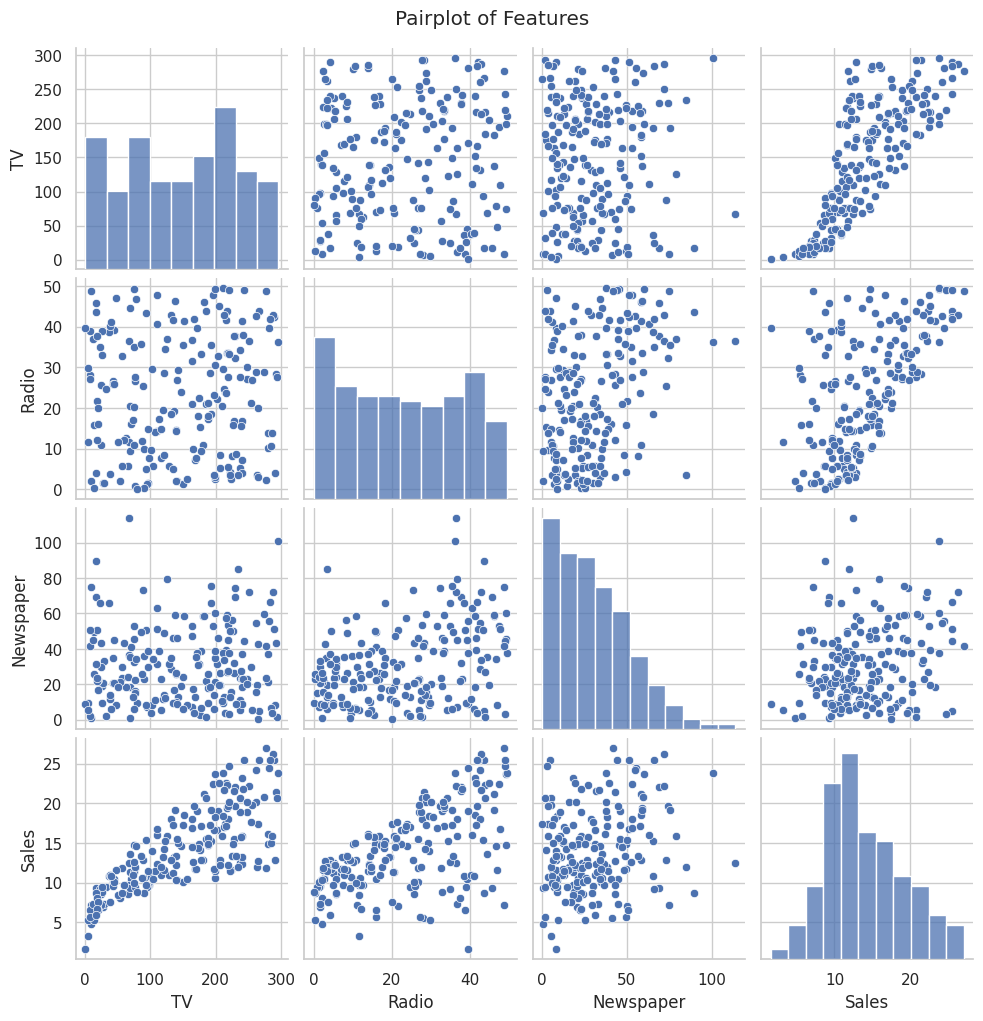

In [44]:
# EDA
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [45]:
# define features and target
X = df[['TV','Radio','Newspaper']]    # independent variable
y = df['Sales']                        # target variable

# Split data into Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train models
#1.Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
#2. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
# Evaluate models
# Linear Regression Evaluation
lr_result = lr_model.predict(X_test)
print("Linear Regression:")
print("R2 Score:", r2_score(y_test, lr_result))
print("MAE:" , mean_squared_error(y_test, lr_result))
print("MSE:" , mean_squared_error(y_test, lr_result))

# using Random Forest
rf_result = rf_model.predict(X_test)
print("\nRandom Forest:")
print("R2 Score:", r2_score(y_test, rf_result))
print("MAE:" , mean_squared_error(y_test, rf_result))
print("MSE:" , mean_squared_error(y_test, rf_result))


Linear Regression:
R2 Score: 0.899438024100912
MAE: 3.1740973539761033
MSE: 3.1740973539761033

Random Forest:
R2 Score: 0.9812843792541843
MAE: 0.5907322499999988
MSE: 0.5907322499999988


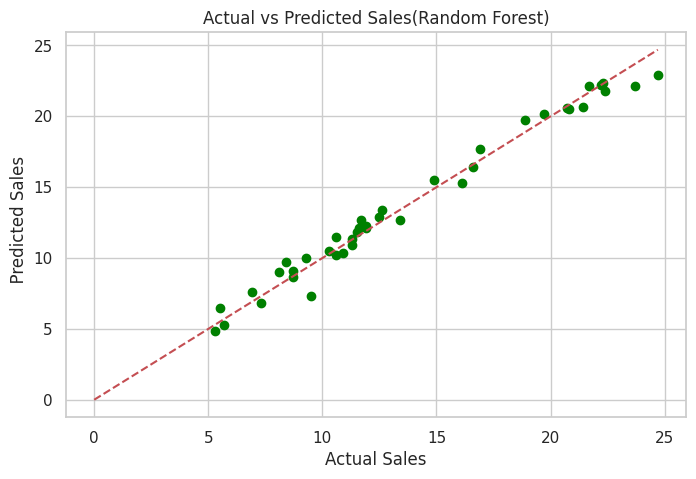

In [47]:
# Actual vs Predicted (Random forest)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_result, color='green')
plt.plot([0,max(y_test)], [0,max(y_test)], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('  Predicted Sales')
plt.title('Actual vs Predicted Sales(Random Forest)')
plt.show()

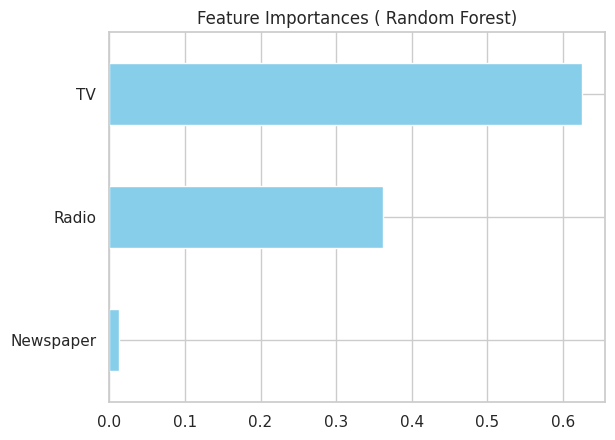

In [48]:
# Plot: Feature importances fron random forest
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh',color='skyblue')
plt.title('Feature Importances ( Random Forest)')
plt.show()